In [104]:
from matplotlib import pyplot as plt
import numpy as np
from math import *

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )

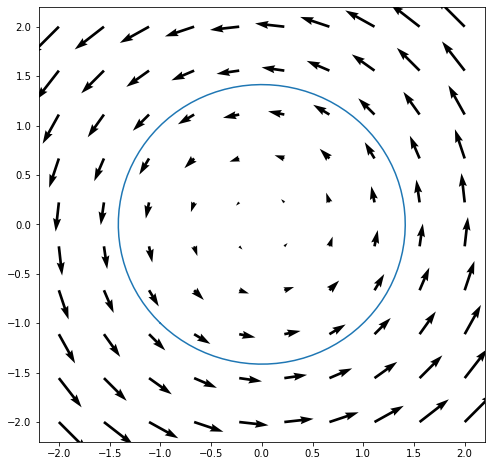

In [3]:
x, y = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))

u = -y
v = x

def x_para(t, x_0=1, y_0=1):
    return x_0 * np.cos(t) + y_0 * np.sin(t)

def y_para(t, x_0=1, y_0=1):
    return y_0 * np.cos(t) - x_0 * np.sin(t)

domain = np.linspace(-pi, pi, 100)

fig = plt.figure(figsize=(8, 8))
plt.quiver(x, y, u, v)
plt.plot(x_para(domain), y_para(domain))
plt.show()

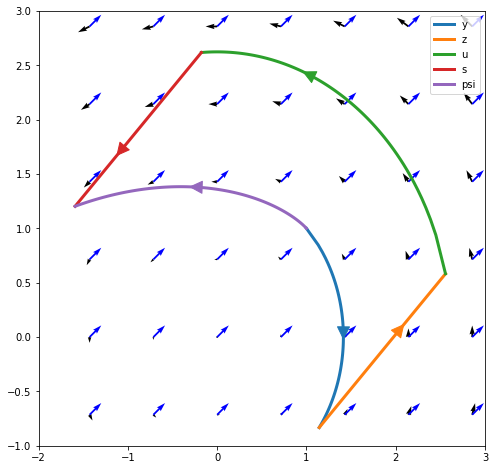

In [105]:
x_mesh, y_mesh = np.meshgrid(np.linspace(-5, 5, 15), np.linspace(-5, 5, 15))

x_vect1 = -y_mesh
y_vect1 =  x_mesh

x_vect2 = np.ones(x_mesh.shape)
y_vect2 = np.ones(y_mesh.shape)

def v(t, x):
    return np.array([x[0] * np.cos(t) + x[1] * np.sin(t),
                     x[1] * np.cos(t) - x[0] * np.sin(t)])

def w(t, x):
    return np.array([x[0] + t,
                     x[1] + t])

vdom = np.linspace(0, 2 * pi, 100)
wdom = np.linspace(0, 1, 100)

def psi(t, x, v, w):
    y = v( np.sqrt(t), x)
    z = w( np.sqrt(t), y[:, -1])
    u = v(-np.sqrt(t), z[:, -1])
    s = w(-np.sqrt(t), u[:, -1])
    
    p = w(-np.sqrt(t), v(-np.sqrt(t), w( np.sqrt(t), v( np.sqrt(t), x))))
    
    return (p, s, y, z, u)

t = np.linspace(0, 2, 100)
p, s, y, z, u = psi(t, (1, 1), v, w)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

l1 = ax.plot(y[0], y[1], lw=3)
add_arrow(l1[0], size=30, position=1.45)

l2 = ax.plot(z[0], z[1], lw=3)
add_arrow(l2[0], size=30)

l3 = ax.plot(u[0], u[1], lw=3)
add_arrow(l3[0], size=30)

l4 = ax.plot(s[0], s[1], lw=3)
add_arrow(l4[0], size=30)

l5 = ax.plot(p[0], p[1], lw=3)
add_arrow(l5[0], size=30)

ax.quiver(x_mesh, y_mesh, x_vect1, y_vect1)
ax.quiver(x_mesh, y_mesh, x_vect2, y_vect2, color='b')

ax.legend(['y', 'z', 'u', 's', 'psi'])
ax.set_xlim(-2, 3)
ax.set_ylim(-1, 3)

plt.show()

In [78]:
x_mesh.shape

(10, 10)

In [99]:
l1[0].get_xdata()

array([1.        , 1.13157171, 1.17952262, 1.21355352, 1.24032185,
       1.26241595, 1.28116803, 1.29737229, 1.311548  , 1.32405713,
       1.33516415, 1.34506939, 1.35392904, 1.36186777, 1.36898697,
       1.37537053, 1.38108879, 1.38620145, 1.39075973, 1.39480798,
       1.3983849 , 1.40152455, 1.40425706, 1.40660929, 1.40860526,
       1.4102666 , 1.41161289, 1.41266185, 1.41342969, 1.41393118,
       1.4141799 , 1.41418837, 1.41396809, 1.41352977, 1.41288329,
       1.41203788, 1.41100211, 1.40978403, 1.40839112, 1.40683045,
       1.40510861, 1.40323183, 1.40120597, 1.39903658, 1.39672889,
       1.39428784, 1.39171813, 1.38902421, 1.38621032, 1.38328049,
       1.38023853, 1.37708811, 1.37383271, 1.37047566, 1.36702015,
       1.36346921, 1.35982576, 1.3560926 , 1.3522724 , 1.34836775,
       1.3443811 , 1.34031484, 1.33617126, 1.33195254, 1.32766081,
       1.32329812, 1.31886642, 1.31436763, 1.30980357, 1.30517602,
       1.30048669, 1.29573724, 1.29092927, 1.28606433, 1.28114